In [317]:
import pandas as pd

fire_incidents = pd.read_json('/Users/loic.doerr/dev/berlin-emergency-ai/data/fire-incidents/interims.json')

In [318]:
print('Incidents Quantity', len(fire_incidents))

Incidents Quantity 31000


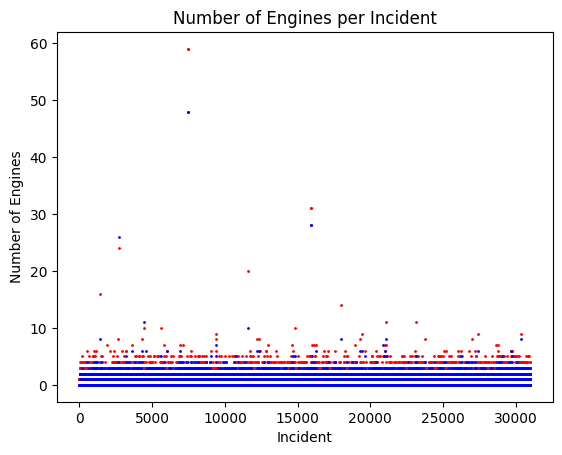

In [319]:
import matplotlib.pyplot as plt

engines_per_incident = [int(incident['engines_assigned_quantity']) for index, incident in fire_incidents.iterrows()]

ladders_per_incident = [int(incident['ladders_assigned_quantity']) for index, incident in fire_incidents.iterrows()]

plt.scatter(range(len(engines_per_incident)), engines_per_incident, s=1, c='red', )
plt.scatter(range(len(engines_per_incident)), ladders_per_incident, s=1, c='blue')
plt.xlabel('Incident')
plt.ylabel('Number of Engines')
plt.title('Number of Engines per Incident')
plt.show()

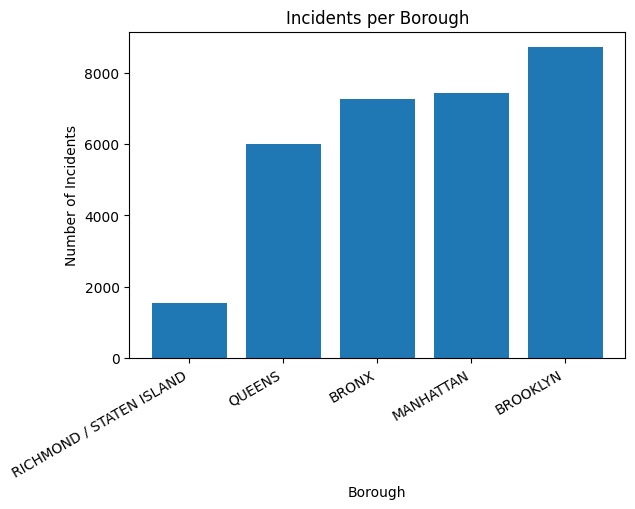

In [320]:
incident_count = fire_incidents['alarm_box_borough'].value_counts().sort_values()

x = incident_count.index
y = incident_count.values

fig, ax = plt.subplots()
ax.bar(x, y)

ax.set_xlabel("Borough")
ax.set_ylabel("Number of Incidents")
ax.set_title("Incidents per Borough")

fig.autofmt_xdate()

plt.show()


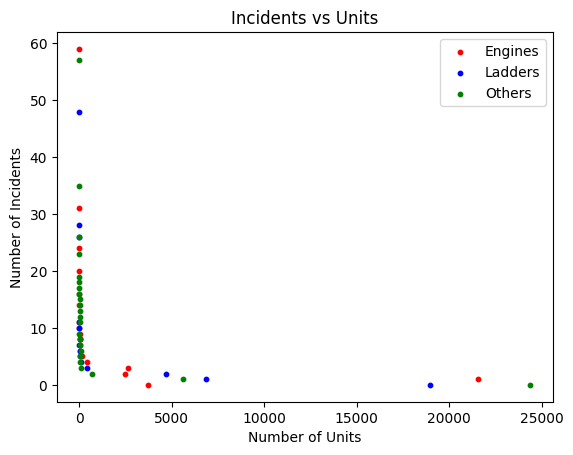

In [321]:
engines_incident_count = fire_incidents['engines_assigned_quantity'].value_counts().sort_values()
ladders_incident_count = fire_incidents['ladders_assigned_quantity'].value_counts().sort_values()
others_incident_count = fire_incidents['other_units_assigned_quantity'].value_counts().sort_values()

fig, ax = plt.subplots()

plt.scatter(engines_incident_count.values, engines_incident_count.index, s=10, c='red', label='Engines')
plt.scatter(ladders_incident_count.values, ladders_incident_count.index, s=10, c='blue', label='Ladders')
plt.scatter(others_incident_count.values, others_incident_count.index, s=10, c='green', label='Others')

plt.xlabel('Number of Units')
plt.ylabel('Number of Incidents')
plt.title('Incidents vs Units')
plt.legend()
plt.show()

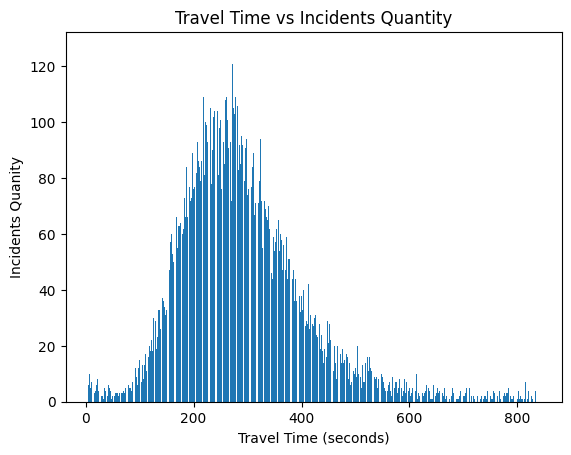

In [328]:
incident_count = fire_incidents['incident_travel_tm_seconds_qy'].value_counts().sort_values()

incident_count = incident_count[incident_count.index != 0]

upper_cut = fire_incidents['incident_travel_tm_seconds_qy'].quantile(0.99)
incident_count = incident_count[incident_count.index <= upper_cut]

plt.bar(incident_count.index, incident_count.values)

plt.xlabel('Travel Time (seconds)')
plt.ylabel('Incidents Quanity')
plt.title('Travel Time vs Incidents Quantity')

plt.show()

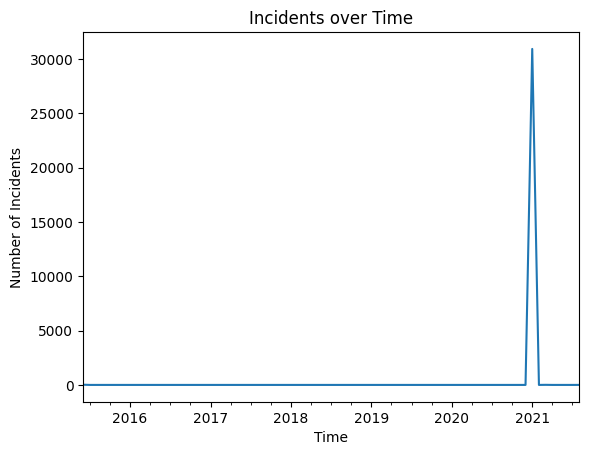

In [338]:
fire_incidents['incident_datetime'] = pd.to_datetime(fire_incidents['incident_datetime'])

fire_incidents.set_index('incident_datetime').resample('ME').size().plot()
plt.title('Incidents over Time')
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.show()

In [350]:
import seaborn as sns

heatmap_data = fire_incidents.groupby(['zipcode', 'count']).size().reset_index(name='counts')

pivot_data = heatmap_data.pivot(index='zipcode', columns='month', values='counts')

sns.heatmap(pivot_data, cmap='viridis')

plt.title('Heatmap of Incidents by Zipcode and Month')
plt.show()

KeyError: 'count'

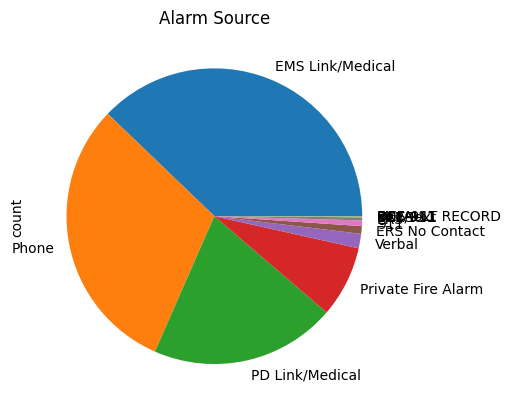

In [344]:
fire_incidents['alarm_source_description_tx'].value_counts().plot(kind='pie')
plt.title('Alarm Source')
plt.show()